<a href="https://colab.research.google.com/github/AnushkaMishra29/Real_time_prediction_of_purchasing_intention_using_Multilayer_Perceptron/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REAL TIME PREDICTION OF ONLINE SHOPPERS PURCHASING INTENTION USING MULTILAYER PERCEPTRON



In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7408,14,181.073333,3,58.4,18,450.506667,0.000000,0.011111,0.000000,0.0,Oct,2,2,1,3,Returning_Visitor,True,False
11993,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Dec,3,2,1,1,Returning_Visitor,False,False
1212,0,0.000000,0,0.0,17,132.633333,0.011765,0.007843,0.000000,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
10910,0,0.000000,0,0.0,41,2997.083333,0.004878,0.021138,36.867018,0.0,Dec,2,2,1,2,Returning_Visitor,True,False
9313,0,0.000000,0,0.0,49,2259.047619,0.008163,0.034694,0.000000,0.0,Nov,2,2,8,1,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
target_distribution=y.value_counts()
target_distribution

,count
Revenue,
False,10422
True,1908


Text(0.5, 1.0, 'Count of visitors based on revenue generated')

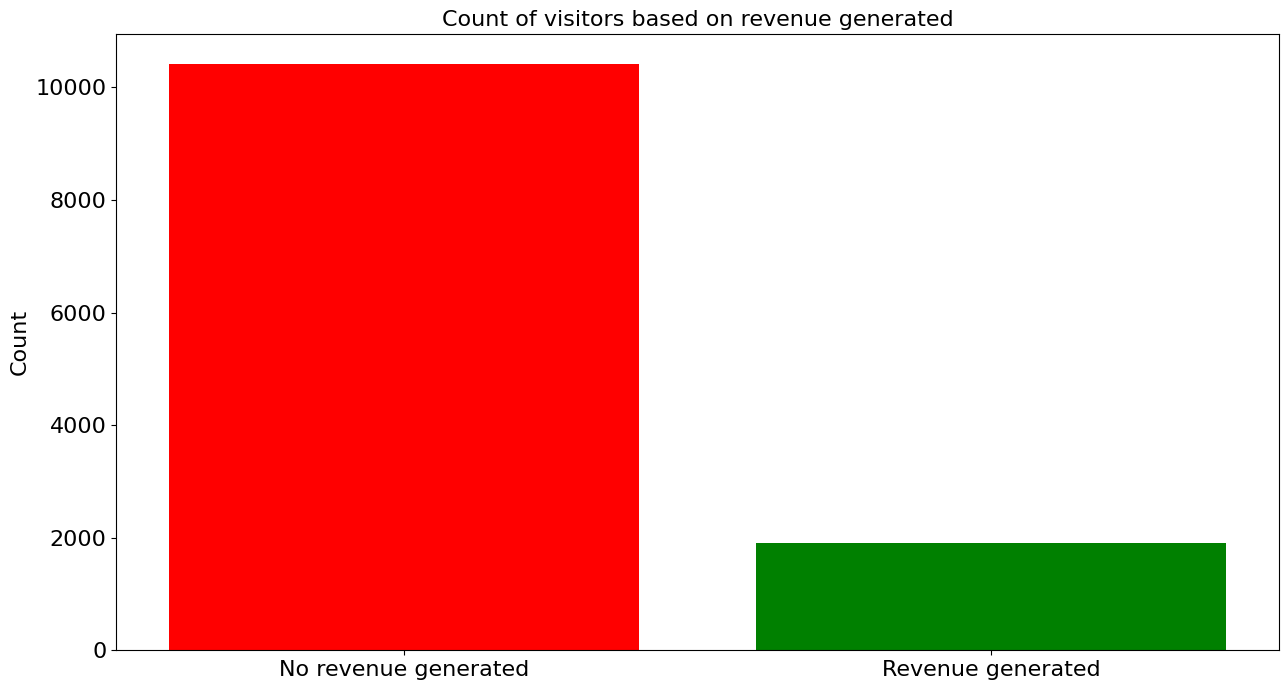

In [6]:
plt.figure(figsize = (15,8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No revenue generated', 'Revenue generated'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

In [ ]:
df.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [7]:
cat_cols_df = df.select_dtypes(include=['object'])
num_cols_df=df.select_dtypes(exclude=['object'])
cat_cols_df.head(5)

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [ ]:
cat_cols_df.nunique()

,0
Month,10
VisitorType,3


In [10]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_array = one_hot_encoder.fit_transform(cat_cols_df[['Month']])
column_names = one_hot_encoder.get_feature_names_out(['Month'])
one_hot_df = pd.DataFrame(one_hot_array, columns=column_names, index=cat_cols_df.index)
one_hot_df.sample(5)


,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
3995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1698,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
one_hot_array1 = one_hot_encoder.fit_transform(cat_cols_df[['VisitorType']])
column_names = one_hot_encoder.get_feature_names_out(['VisitorType'])
one_hot_df1 = pd.DataFrame(one_hot_array1, columns=column_names, index=cat_cols_df.index)
one_hot_df1.head()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [12]:
data_df=pd.concat([one_hot_df1,one_hot_df1,num_cols_df],axis=1)
data_df.head(5)

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,...,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.20,0.20,0.0,0.0,1,1,1,1,False,False
1,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.00,0.10,0.0,0.0,2,2,1,2,False,False
2,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.20,0.20,0.0,0.0,4,1,9,3,False,False
3,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.05,0.14,0.0,0.0,3,2,2,4,False,False
4,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.02,0.05,0.0,0.0,3,3,1,4,True,False


In [13]:
data_df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})
data_df.head(5)

<ipython-input-13-b70682fc054c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})


,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,...,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.20,0.20,0.0,0.0,1,1,1,1,0,False
1,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.00,0.10,0.0,0.0,2,2,1,2,0,False
2,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.20,0.20,0.0,0.0,4,1,9,3,0,False
3,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.05,0.14,0.0,0.0,3,2,2,4,0,False
4,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0,0.0,...,0.02,0.05,0.0,0.0,3,3,1,4,1,False


In [14]:
data_df.corr()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,...,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType_New_Visitor,1.000000,-0.033250,-0.971911,1.000000,-0.033250,-0.971911,0.028449,0.025043,-0.053429,-0.043200,...,-0.139351,-0.183898,0.104952,-0.082740,-0.042157,-0.016178,0.020735,-0.021064,0.047381,0.104136
VisitorType_Other,-0.033250,1.000000,-0.202903,-0.033250,1.000000,-0.202903,-0.021184,-0.008542,-0.021457,-0.013489,...,0.028112,0.034763,0.055204,-0.025730,0.338236,0.317166,0.129580,0.198981,-0.029630,0.007715
VisitorType_Returning_Visitor,-0.971911,-0.202903,1.000000,-0.971911,-0.202903,1.000000,-0.022884,-0.022525,0.057399,0.045501,...,0.129908,0.171987,-0.115825,0.087123,-0.038345,-0.058836,-0.050829,-0.026219,-0.039444,-0.103843
VisitorType_New_Visitor,1.000000,-0.033250,-0.971911,1.000000,-0.033250,-0.971911,0.028449,0.025043,-0.053429,-0.043200,...,-0.139351,-0.183898,0.104952,-0.082740,-0.042157,-0.016178,0.020735,-0.021064,0.047381,0.104136
VisitorType_Other,-0.033250,1.000000,-0.202903,-0.033250,1.000000,-0.202903,-0.021184,-0.008542,-0.021457,-0.013489,...,0.028112,0.034763,0.055204,-0.025730,0.338236,0.317166,0.129580,0.198981,-0.029630,0.007715
VisitorType_Returning_Visitor,-0.971911,-0.202903,1.000000,-0.971911,-0.202903,1.000000,-0.022884,-0.022525,0.057399,0.045501,...,0.129908,0.171987,-0.115825,0.087123,-0.038345,-0.058836,-0.050829,-0.026219,-0.039444,-0.103843
Administrative,0.028449,-0.021184,-0.022884,0.028449,-0.021184,-0.022884,1.000000,0.601583,0.376850,0.255848,...,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.025043,-0.008542,-0.022525,0.025043,-0.008542,-0.022525,0.601583,1.000000,0.302710,0.238031,...,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,-0.053429,-0.021457,0.057399,-0.053429,-0.021457,0.057399,0.376850,0.302710,1.000000,0.618955,...,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,-0.043200,-0.013489,0.045501,-0.043200,-0.013489,0.045501,0.255848,0.238031,0.618955,1.000000,...,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345


In [15]:
X1=data_df.iloc[:,:-1]
y1=data_df.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [29]:
X_train.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [17]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated','OperatingSystems', 'Region', 'TrafficType'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated','OperatingSystems', 'Region', 'TrafficType'], axis = 1)


In [18]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [25]:
X_test

array([[-0.3981989 , -0.08753091,  0.41092441, ..., -0.30836428,
         3.27184866, -0.54329372],
       [-0.3981989 , -0.08753091,  0.41092441, ..., -0.30836428,
        -0.20865122, -0.54329372],
       [-0.3981989 , -0.08753091,  0.41092441, ..., -0.30836428,
        -0.20865122, -0.54329372],
       ...,
       [-0.3981989 , -0.08753091,  0.41092441, ..., -0.30836428,
        -0.20865122, -0.54329372],
       [-0.3981989 , -0.08753091,  0.41092441, ..., -0.30836428,
        -0.78873453, -0.54329372],
       [-0.3981989 , -0.08753091,  0.41092441, ...,  2.72122263,
        -0.20865122, -0.54329372]])

In [30]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tesnor= torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.float32).unsqueeze(1)
y_test_tensor=torch.tensor(y_test.values,dtype=torch.float32)

In [33]:
dataset=TensorDataset(X_train_tensor,y_train_tensor)
validation_size=int(0.1*(len(dataset)))
train_size=len(dataset)-validation_size
train_dataset,validation_dataset=torch.utils.data.random_split(dataset,[train_size,validation_size])

In [35]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
validation_loader=DataLoader(validation_dataset,batch_size=32,shuffle=True)

In [58]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(15, 128),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [59]:
model=Classifier()
criterion=nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [61]:
num_epochs = 100

for i in range(num_epochs):
    model.train()
    correct, total = 0, 0

    for input, target in train_loader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        predicted = (output >= 0.5).float()
        correct += (predicted == target).sum().item()
        total += target.size(0)

    train_acc = correct / total

    if (i + 1) % 10 == 0:
        print(f"Epoch {i+1}/{num_epochs}, Training Accuracy: {train_acc:.4f}")


Epoch 10/100, Training Accuracy: 0.8946
Epoch 20/100, Training Accuracy: 0.8974
Epoch 30/100, Training Accuracy: 0.8996
Epoch 40/100, Training Accuracy: 0.8981
Epoch 50/100, Training Accuracy: 0.8983
Epoch 60/100, Training Accuracy: 0.9002
Epoch 70/100, Training Accuracy: 0.8994
Epoch 80/100, Training Accuracy: 0.9027
Epoch 90/100, Training Accuracy: 0.9004
Epoch 100/100, Training Accuracy: 0.8985


In [64]:
for j in range(num_epochs):
  model.eval()
  with torch.no_grad():
    c=0
    t=0
    for ip,tar in validation_loader:
      out=model(ip)
      pred=(out>0.5).float()
      c+=(pred==tar).sum().item()
      t+=tar.size(0)
    val_acc=c/t
    if (j + 1) % 10 == 0:
        print(f"Epoch {j+1}/{num_epochs}, Training Accuracy: {val_acc:.4f}")

Epoch 10/100, Training Accuracy: 0.9148
Epoch 20/100, Training Accuracy: 0.9148
Epoch 30/100, Training Accuracy: 0.9148
Epoch 40/100, Training Accuracy: 0.9148
Epoch 50/100, Training Accuracy: 0.9148
Epoch 60/100, Training Accuracy: 0.9148
Epoch 70/100, Training Accuracy: 0.9148
Epoch 80/100, Training Accuracy: 0.9148
Epoch 90/100, Training Accuracy: 0.9148
Epoch 100/100, Training Accuracy: 0.9148


In [66]:
model.eval()
with torch.no_grad():
  y_pred_probab=model(X_test_tesnor)
  y_pred = (y_pred_probab > 0.5).float()

In [67]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[2005   50]
 [ 237  174]]
Accuracy: 88.36%
